In [1]:
#import statements
import tensorflow
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
DataDir = r"ChestXrays/train" #dataset directory is given to fetch the training data

In [3]:
CATEGORIES = ["normal", "opacity"] #There are 2 possibilities. 1)No pnuemonia(normal) and 2)Pnuemonia(opacity)

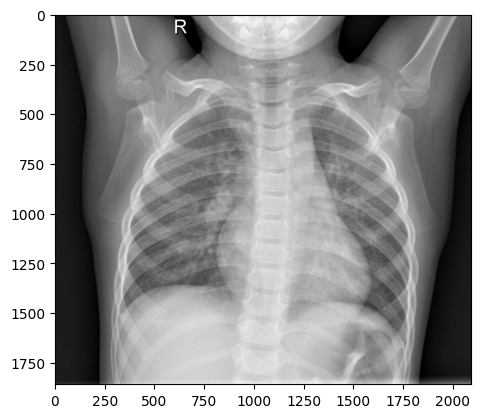

In [4]:
#converting the image to grayscale
for i in CATEGORIES:
    path = os.path.join(DataDir, i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break

In [5]:
img_size = 100

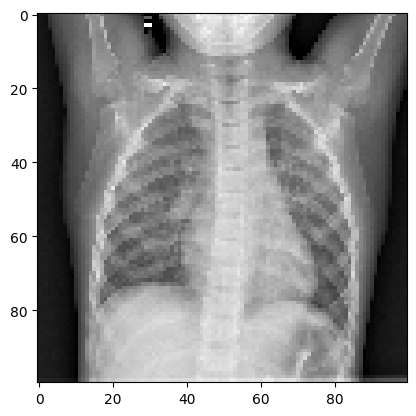

In [6]:
#resizing the image to 100 x 100
#pooling layer
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(new_array,cmap='gray')
plt.show()

In [7]:
training_data = []

In [8]:
#converting the whole training dataset to grayscale images
def create_training_data():
    for i in CATEGORIES:
        path = os.path.join(DataDir,i)
        class_num = CATEGORIES.index(i)
        
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

In [9]:
create_training_data()

In [10]:
print(len(training_data))

4192


In [11]:
#shuffling the data to train the model
import random
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample)

[array([[ 19,  21,  23, ...,   6,  57,  18],
       [ 18,  22,  25, ...,   2,   9,   3],
       [ 18,  22,  27, ...,   1,   0,   0],
       ...,
       [ 13,  10,  17, ...,   0,   0,   0],
       [  4,   6,   4, ...,   0,   0,   0],
       [  3, 243,   6, ...,   0,   0,   0]], dtype=uint8), 1]
[array([[ 6,  7,  6, ..., 23, 29, 33],
       [ 5,  5,  6, ..., 32, 36, 47],
       [ 4,  6,  8, ..., 40, 39, 15],
       ...,
       [ 4, 14, 20, ...,  5,  8,  6],
       [13, 16, 18, ...,  4,  8,  9],
       [14, 16, 17, ...,  4,  7,  9]], dtype=uint8), 1]
[array([[ 56,  88, 100, ..., 145, 131, 115],
       [ 87, 106, 116, ..., 141, 129, 124],
       [126, 113, 113, ..., 136, 134, 123],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8), 1]
[array([[46, 59, 71, ..., 18,  0,  0],
       [41, 51, 67, ..., 12,  0,  0],
       [35, 53, 61, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,

In [12]:
X = []
y = []

In [13]:
for features, label in training_data:
    X.append(features)
    y.append(label)

In [14]:
print(X[0].reshape(-1,img_size,img_size,1)) 

[[[[ 19]
   [ 21]
   [ 23]
   ...
   [  6]
   [ 57]
   [ 18]]

  [[ 18]
   [ 22]
   [ 25]
   ...
   [  2]
   [  9]
   [  3]]

  [[ 18]
   [ 22]
   [ 27]
   ...
   [  1]
   [  0]
   [  0]]

  ...

  [[ 13]
   [ 10]
   [ 17]
   ...
   [  0]
   [  0]
   [  0]]

  [[  4]
   [  6]
   [  4]
   ...
   [  0]
   [  0]
   [  0]]

  [[  3]
   [243]
   [  6]
   ...
   [  0]
   [  0]
   [  0]]]]


In [15]:
y = np.array(y)

In [16]:
X = np.array(X).reshape(-1,img_size,img_size,1) #reshaping the image array

In [17]:
validation_data=[]
DataDir_val = r"ChestXrays/val" #valuation data directory

In [18]:
#converting the whole validation dataset to grayscale images
def create_validating_data():
    for i in CATEGORIES:
        path = os.path.join(DataDir_val,i)
        class_num = CATEGORIES.index(i)
        
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE) #converts to grayscale
                new_array = cv2.resize(img_array,(img_size,img_size)) #resizes the image to 100 x 100 pixels
                validation_data.append([new_array,class_num]) 
            except Exception as e:
                pass

In [19]:
create_validating_data()

In [20]:
print(len(validation_data))

1040


In [21]:
#shuffling the validation data
import random
random.shuffle(validation_data)
for sample in validation_data[:10]:
    print(sample)

[array([[  0,   0,   0, ..., 109,  94,  78],
       [  0,   0,   0, ..., 252,  89,  71],
       [  1,   0,   0, ..., 254,  18,  50],
       ...,
       [  0,   0,   0, ...,   5,   7, 239],
       [  1,   0,   0, ...,   5, 253,   4],
       [  0,   0,   0, ...,   8,   9,   4]], dtype=uint8), 1]
[array([[33, 31, 28, ..., 50, 49, 44],
       [32, 31, 27, ..., 46, 44, 38],
       [31, 30, 26, ..., 43, 41, 35],
       ...,
       [ 3,  0,  8, ...,  2,  0,  3],
       [ 3,  0, 11, ...,  2,  0,  3],
       [ 3,  0, 14, ...,  3,  0,  3]], dtype=uint8), 1]
[array([[  3,  10,  16, ..., 102, 100, 106],
       [  4,   8,  16, ...,  99, 102, 119],
       [  4,   7,  14, ..., 100, 106, 132],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8), 1]
[array([[  6,   5,   5, ...,   1, 224, 254],
       [  6,   5,   5, ...,   9,   8,  16],
       [  5,   5,   5, ..., 223, 136,  46],
       ...,
      

In [22]:
X_val = []
y_val = []

In [23]:
for features, label in validation_data:
    X_val.append(features)
    y_val.append(label)

In [24]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
import pickle
from keras.layers import Conv2D, MaxPooling2D

In [25]:
#Dividing the image intensities by 255
X = X.astype('float32')/255.0
X_val = np.array(X_val).reshape(-1,img_size,img_size,1)
X_val = X_val/255.0
y_val = np.array(y_val)

In [26]:
X_val.shape

(1040, 100, 100, 1)

In [27]:
#CNN is a sequential model
model = Sequential()

#layer 1 - convolution layer
model.add(Conv2D(64,(3,3),input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#layer 2 - convolution layer
model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#layer 3 - Convolution layer
model.add(Conv2D(256,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#layer 4 - flattening layer
model.add(Flatten())
model.add(Dense(64))
model.add(Dropout(.5))

#layer 5 - output layer
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 64)        640       
                                                                 
 activation (Activation)     (None, 98, 98, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 128)       73856     
                                                                 
 activation_1 (Activation)   (None, 47, 47, 128)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 128)      0         
 2D)                                                    

In [29]:
#compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [30]:
#training the model for 10 epochs and valuating using the valuation dataset
model.fit(X,y,batch_size=4,epochs=10,validation_data=(X_val,y_val))

Epoch 1/10
1048/1048 [==============================] - 45s 43ms/step - loss: 0.2689 - accuracy: 0.8969 - val_loss: 0.1363 - val_accuracy: 0.9433
Epoch 2/10
1048/1048 [==============================] - 44s 42ms/step - loss: 0.1424 - accuracy: 0.9487 - val_loss: 0.1322 - val_accuracy: 0.9452
Epoch 3/10
1048/1048 [==============================] - 44s 42ms/step - loss: 0.1230 - accuracy: 0.9542 - val_loss: 0.1169 - val_accuracy: 0.9519
Epoch 4/10
1048/1048 [==============================] - 44s 42ms/step - loss: 0.1013 - accuracy: 0.9637 - val_loss: 0.0760 - val_accuracy: 0.9673
Epoch 5/10
1048/1048 [==============================] - 44s 42ms/step - loss: 0.0918 - accuracy: 0.9659 - val_loss: 0.0713 - val_accuracy: 0.9740
Epoch 6/10
1048/1048 [==============================] - 43s 41ms/step - loss: 0.0886 - accuracy: 0.9690 - val_loss: 0.0778 - val_accuracy: 0.9702
Epoch 7/10
1048/1048 [==============================] - 44s 42ms/step - loss: 0.0766 - accuracy: 0.9719 - val_loss: 0.0993 -

In [31]:
#exporting the model
model.save(r"model_10.h5")

In [32]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import load_model

In [33]:
CATEGORIES = ["normal","opacity"]

In [34]:
def prepare(image):
    img_size=100
    img=tf.keras.preprocessing.image.load_img(image,color_mode="grayscale",target_size=(img_size,img_size))
    new_array = tf.keras.preprocessing.image.img_to_array(img)
    return new_array.reshape(-1,img_size,img_size,1)

In [35]:
model = tf.keras.models.load_model(r"model_10.h5")

In [43]:
image = 'ChestXrays/test/person122_bacteria_585.jpeg'

In [44]:
prediction = model.predict([prepare(image)/255.0])
prediction

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)

In [45]:
print(prediction)
print((prediction[0][0]))
print(CATEGORIES[int(round(prediction[0][0]))])

[[1.]]
1.0
opacity


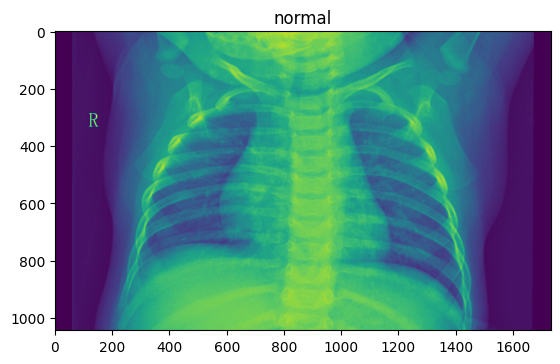

In [42]:
img = mpimg.imread(image)
imgplot = plt.imshow(img)
plt.title(CATEGORIES[int((round(prediction[0][0])))])
plt.show()